In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/charilaostsarouchas/anaconda/lib/python2.7/argparse.pyc, but /Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


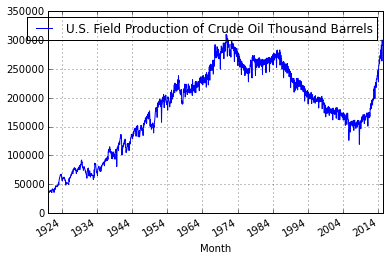

In [70]:
# parse the data
df = pd.read_csv("../../data/timeseries/U.S._Field_Production_of_Crude_Oil.csv")

# do some light manipulation
df["Month"] = pd.to_datetime(df["Month"])
df.index = df["Month"]
col1 = df.columns[1]
col1_new = col1.replace(" ", "us_oil_production")
df.rename(columns={col1: col1_new})

# and plot the timeseries
df.plot()

### Zoom to time interval

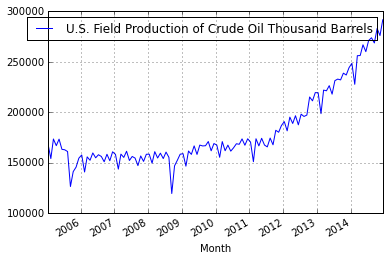

In [71]:
# Lets say we want to see only the last 5 years  
df10 = df["2005":"2014"]
df10.plot()
# or the same by df.ix["2005":"2014"].plot()

### Resample

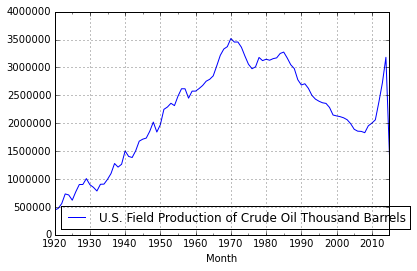

In [72]:
# The command to be used is the "resample" in pandas
# takes two main arguments 
# rule, see below 
# how, use arguemnts like "sum" or "mean"
"""
B   business day frequency
C   custom business day frequency (experimental)
D   calendar day frequency
W   weekly frequency
M   month end frequency
BM  business month end frequency
MS  month start frequency
BMS business month start frequency
Q   quarter end frequency
BQ  business quarter endfrequency
QS  quarter start frequency
BQS business quarter start frequency
A   year end frequency
BA  business year end frequency
AS  year start frequency
BAS business year start frequency
H   hourly frequency
T   minutely frequency
S   secondly frequency
L   milliseconds
U   microseconds
"""
df.resample('A', how='sum').plot()

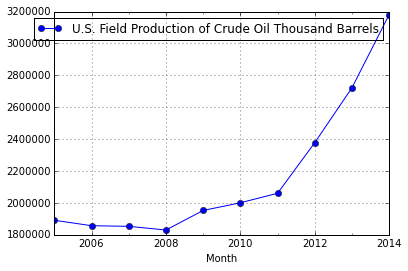

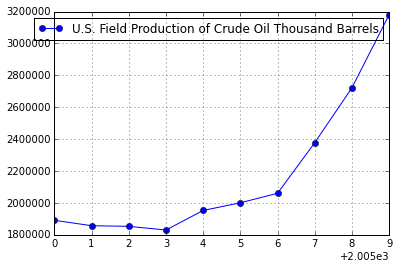

In [73]:
# Lets assume we want to see the sum of production (thousant barrels) of the last 10 years aggregated per year.
# We can do it with two ways
# 1) 
df10.resample('A', how='sum').plot( marker="o")
# 2)
df10.groupby(df10.index.year).sum().plot( marker="o")

# !!! Attention
# although aritmetically the results are same, the time in axis is preserved only using the first way

### Group by

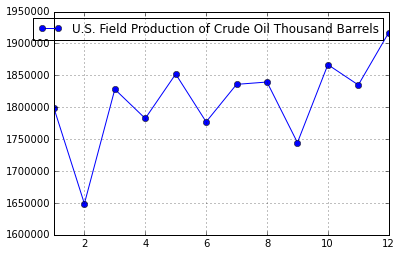

In [94]:
# lets see if we see some trend when we group by the month 
df10.groupby(df10.index.month).sum().plot(marker="o")

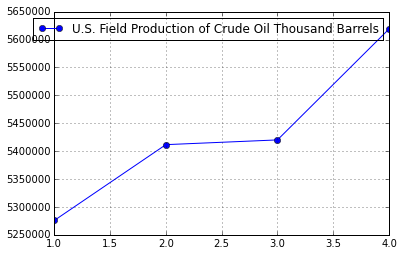

In [97]:
# lets see if we see some trend when we group by the quarter of the year
df10.groupby(df10.index.quarter).sum().plot(marker="o")

# seems like more production comes in the end of the year

### Interpolate

In [122]:
# when plot,  end even more often when we aggregate - especially not regular / complete time series, we can have gaps.
# Many times makes sense to interpolate 

# df10.resample('A', how='sum').interpolate(method="cubic").plot( marker="o")
# here there is no difference because there are no gaps to interpolate